# Project 3 (Core)

## Data Dictionary

### title.akas.tsv.gz
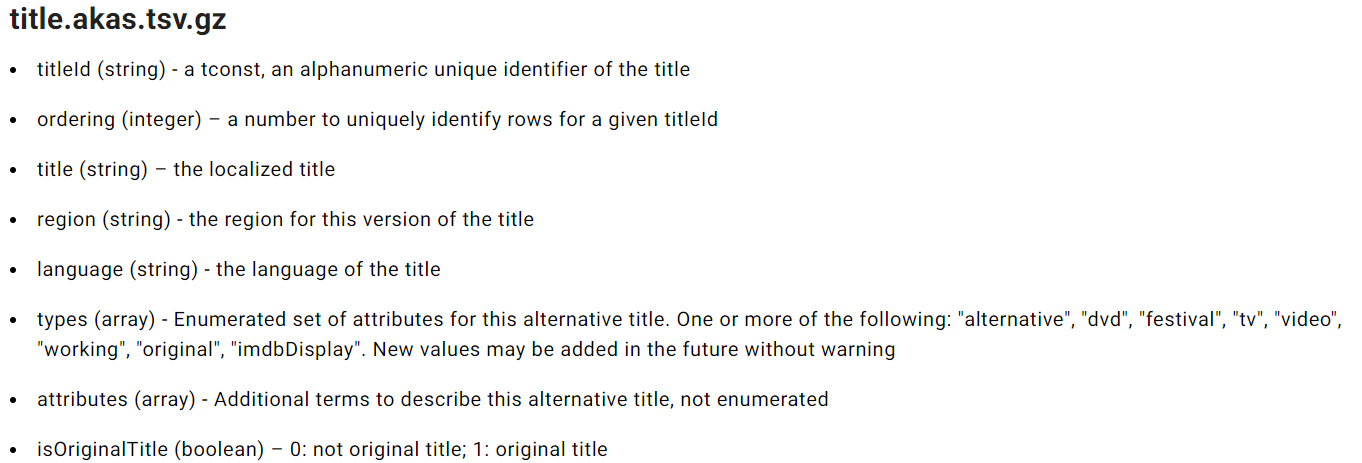

### title.basics.tsv.gz
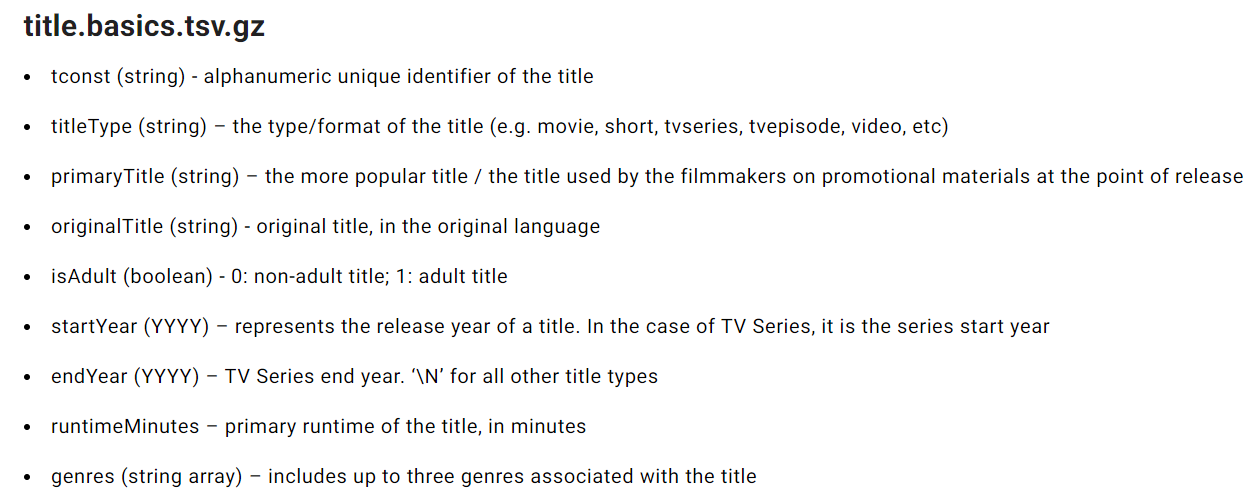

### title.ratings.tsv.gz
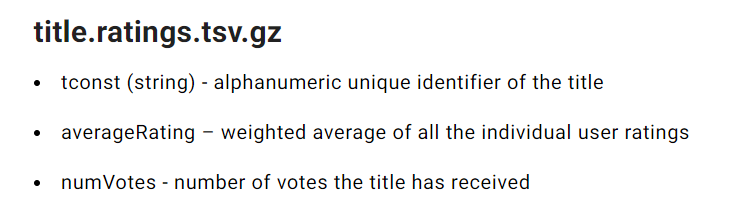

## Import Libraries

In [31]:
# Import Libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Display all column names
pd.set_option('display.max_columns', None)

## Load in datasources

In [2]:
# load each link into a dedicated variable
akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'
basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

## Read in the data from Variables above

In [3]:
# load in akas data
akas = pd.read_csv(akas_url, sep='\t', low_memory=False)

In [4]:
# Load in basics data
basics = pd.read_csv(basics_url, sep='\t', low_memory=False)

In [5]:
# load in ratings data
ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)

## Create copies of each dataframe for Cleaning

In [6]:
# Create a copy of each dataframe.
akas_df = akas.copy()
basics_df = basics.copy()
ratings_df = ratings.copy()

## Preprocessing


### AKA_df

In [32]:
# Display the first 5 rows pre-preprocessing.
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0


In [8]:
# # Replace "\N" with np.nan
akas_df = akas_df.replace({'\\N':np.nan})

In [9]:
akas_df = akas_df[akas_df['region']=='US']

In [10]:
# Display the head of the table post preprocessing
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0


### Basics_df



In [11]:
# Display the first 5 rows pre-preprocessing
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
# Replace "\N" with np.nan
basics_df = basics_df.replace({'\\N':np.nan})

In [14]:
# Ensure that US films are only kept
keepers = basics_df['tconst'].isin(akas_df['titleId'])

In [15]:
basics_df = basics_df[keepers]

In [20]:
# Create a filter for years 2000 & 2001
years = ['2000', '2001']

# Apply the filter to the dataframe
basics_df = basics_df[basics_df['startYear'].isin(years)]

In [36]:
# Apply the filter to the dataframe
basics_df = basics_df[basics_df['genres'] != 'Documentary']

In [37]:
# Display the head of the table post preprocessing
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
33800,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,NaN,20,Short
34800,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
108549,tt0111056,tvSeries,Gensomaden Saiyuki,Gensomaden Saiyuki,0,2000,2001,23,"Action,Adventure,Animation"
110465,tt0113026,movie,The Fantasticks,The Fantasticks,0,2000,NaN,86,"Musical,Romance"
110528,tt0113092,movie,For the Cause,For the Cause,0,2000,NaN,100,"Action,Adventure,Drama"


### Ratings_df

In [22]:
# Display the first 5 rows pre-preprocessing.
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1901
3,tt0000004,5.5,178
4,tt0000005,6.2,2685


In [23]:
# Replace "\N" with np.nan
ratings_df = ratings_df.replace({'\\N':np.nan})

In [24]:
# Ensure that US films are only kept
keepers2 = ratings_df['tconst'].isin(akas_df['titleId'])

In [25]:
ratings_df = ratings_df[keepers2]

In [26]:
# Display the head of the table post preprocessing
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
4,tt0000005,6.2,2685
5,tt0000006,5.0,183
6,tt0000007,5.4,840


## Saving output files

In [38]:
## Save current dataframe to file.
basics_df.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)

In [28]:
## Save current dataframe to file.
akas_df.to_csv("Data/title_akas.csv.gz", compression='gzip',index=False)

In [29]:
## Save current dataframe to file.
ratings_df.to_csv("Data/title_ratings.csv.gz", compression='gzip',index=False)